<a href="https://colab.research.google.com/github/adam2390/umwf/blob/main/UM_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px

In [2]:
from datetime import datetime

**ETAP 1 - WCZYTANIE DANYCH I PODSTAWOWA ANALIZA**

In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.6 MB 22.0 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=b403217fd8a3e20ab3fe79f36b8956f41c9a7a7e9cc364c6ac354d4e5535a21e
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [4]:
from ydata_profiling import ProfileReport

In [5]:
#url = 'https://github.com/adam2390/umwf/blob/main/wig_budow_w.csv'
url = 'https://raw.githubusercontent.com/adam2390/umwf/master/wig_budow_w.csv'
url2 = 'https://raw.githubusercontent.com/adam2390/umwf/master/wig_banki_wig_paliwa.csv'
df_raw = pd.read_csv(url)
df_raw2 = pd.read_csv(url2)

In [6]:
df_raw.columns

Index(['Unnamed: 0', 'Date', 'W_BUD_Close', 'W_Close', 'LW_BUD_Close',
       'DLW_BUD_Close', 'LW_Close', 'DLW_Close', 'NBP_stopy',
       'LAG_DLW_BUD_Close_1', 'LAG_DLW_Close_1', '2DLW_BUD_Closer',
       '2DLW_Close', 'WIG_NCHROM', 'LWIG_NCHROM', 'DLWIG_NCHROM',
       'DNBP_stopy'],
      dtype='object')

In [7]:
df = df_raw[['Date','W_Close', 'W_BUD_Close', 'WIG_NCHROM']]
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<ipython-input-7-d8830a391878>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


Date  W_Close  W_BUD_Close  WIG_NCHROM
0 2007-01-07  49560.3      7793.67     4956.03
1 2007-01-14  51020.9      8092.16     5102.09
2 2007-01-21  54048.2      8760.36     5404.82
3 2007-01-28  53488.0      9394.62     5348.80
4 2007-02-04  55314.0      9738.73     5531.40

In [8]:
df2 = df_raw2[['Date','WIG_BANKI_Close','WIG_PALIWA_Close']]
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'].dtype

# df2.head()

<ipython-input-8-8ae335221f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'])


dtype('<M8[ns]')

In [9]:
df = pd.merge(df, df2, on='Date')
df.head()

Date  W_Close  W_BUD_Close  WIG_NCHROM  WIG_BANKI_Close  \
0 2007-01-07  49560.3      7793.67     4956.03          7080.57   
1 2007-01-14  51020.9      8092.16     5102.09          7128.55   
2 2007-01-21  54048.2      8760.36     5404.82          7740.64   
3 2007-01-28  53488.0      9394.62     5348.80          7514.48   
4 2007-02-04  55314.0      9738.73     5531.40          7960.57   

   WIG_PALIWA_Close  
0           3102.80  
1           3085.47  
2           3091.59  
3           3072.63  
4           3147.76

In [10]:
df.rename(columns={'W_Close': 'WIG','W_BUD_Close':'WIG_BUDOW','WIG_BANKI_Close':'WIG_BANKI','WIG_PALIWA_Close':'WIG_PALIWA'},inplace=True)
#df = df.set_index('Date') #nwm czy potrzebne
df.head()

Date      WIG  WIG_BUDOW  WIG_NCHROM  WIG_BANKI  WIG_PALIWA
0 2007-01-07  49560.3    7793.67     4956.03    7080.57     3102.80
1 2007-01-14  51020.9    8092.16     5102.09    7128.55     3085.47
2 2007-01-21  54048.2    8760.36     5404.82    7740.64     3091.59
3 2007-01-28  53488.0    9394.62     5348.80    7514.48     3072.63
4 2007-02-04  55314.0    9738.73     5531.40    7960.57     3147.76

In [25]:
df_nbp = df_raw[['Date', 'NBP_stopy']]
df_nbp['Date'] = pd.to_datetime(df_nbp['Date'])
df_nbp.head()

<ipython-input-25-af274c055f62>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date  NBP_stopy
0 2007-01-07        4.0
1 2007-01-14        4.0
2 2007-01-21        4.0
3 2007-01-28        4.0
4 2007-02-04        4.0

In [12]:
df[['WIG','WIG_BUDOW','WIG_NCHROM','WIG_BANKI','WIG_PALIWA']].describe().transpose()

count          mean          std       min       25%       50%  \
WIG         833.0  50715.256146  9754.996945  21690.80  44732.92  51020.90   
WIG_BUDOW   833.0   3808.122173  2208.495385   1370.28   2252.86   2932.24   
WIG_NCHROM  833.0   2293.792257  1057.695767   1024.30   1478.98   2122.08   
WIG_BANKI   833.0   6617.217731  1363.741129   2533.36   5836.48   6704.78   
WIG_PALIWA  833.0   4435.644502  1769.040353   1607.27   2982.43   3828.80   

                 75%       max  
WIG         57877.81  74813.24  
WIG_BUDOW    4502.41  12256.70  
WIG_NCHROM   2620.58   6543.82  
WIG_BANKI    7670.09   9524.06  
WIG_PALIWA   6062.53   8541.08

In [13]:
report = ProfileReport(df[['WIG',	'WIG_BUDOW',	'WIG_NCHROM','WIG_BANKI','WIG_PALIWA']])
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
def time_series(y):
  sns.set_style('darkgrid')
  sns.set(rc={'figure.figsize':(14,8)})

  ax = sns.lineplot(data=df, x = 'Date', y = y,
                    legend='auto', lw=3)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(700))
  plt.ylabel('Cena zamknięcia')
  plt.xlabel('Data')
  plt.show()

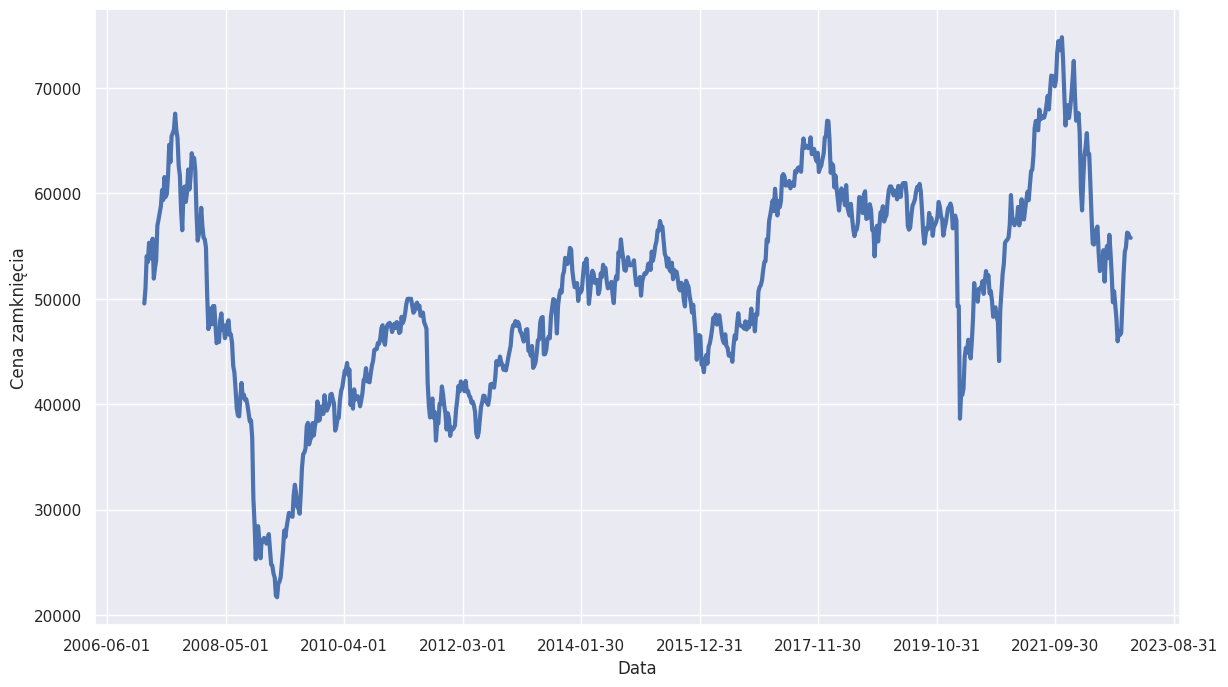

In [15]:
time_series('WIG')

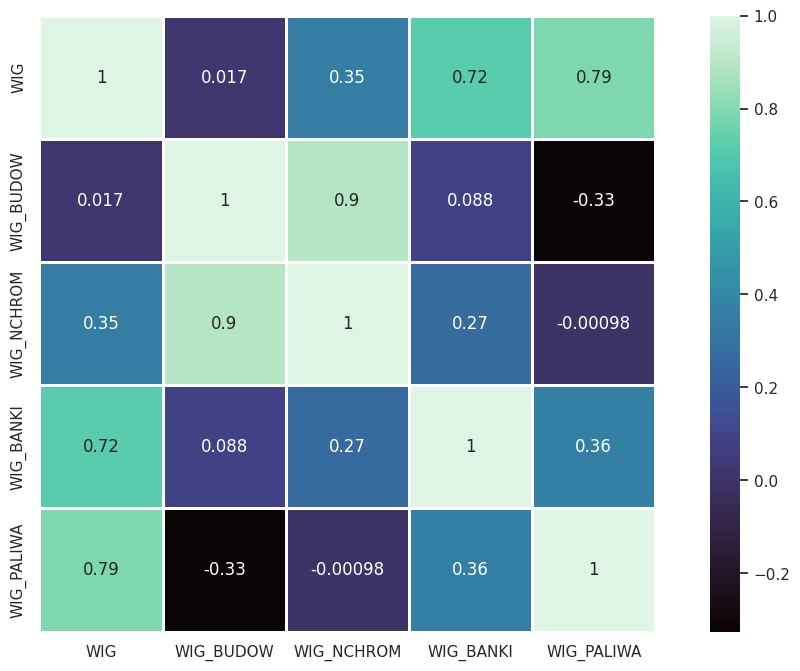

In [16]:
#Korelacja pomiędzy indeksami
df_corr = df[['WIG',	'WIG_BUDOW',	'WIG_NCHROM','WIG_BANKI','WIG_PALIWA']].corr(method = "pearson")  
sns.heatmap(data = df_corr, annot = True, linewidth = 1, linecolor = 'w', square = True, cmap = 'mako')
plt.show()

In [17]:
def boxplot(y):
  fig = px.box(df, y = y, width=600, height=400)
  fig.show()

In [18]:
boxplot('WIG')

In [19]:
def find_outliers(column):
  
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR=q3-q1
  outliers = df[column][((df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR)))]
  print('Liczba outlierów: '+ str(len(outliers)))
  print('Największa wartość outliera: '+ str(outliers.max()))
  print('Najmniejsza wartość outliera: '+ str(outliers.min()))
  return outliers

In [20]:
find_outliers('WIG')

Liczba outlierów: 10
Największa wartość outliera: 24813.0
Najmniejsza wartość outliera: 21690.8


107    24798.0
108    24685.4
109    23914.4
110    23555.5
111    21831.6
112    21690.8
113    22948.5
114    23176.7
115    23581.9
116    24813.0
Name: WIG, dtype: float64

In [21]:
# Stopy NBP

In [22]:
df_nbp.describe().transpose()

count      mean       std  min  25%  50%   75%   max
NBP_stopy  833.0  2.822149  1.727473  0.1  1.5  2.5  4.25  6.75

In [23]:
fig = px.line(df_nbp, x="Date", y="NBP_stopy", color_discrete_sequence = ['navy'])

fig.add_shape( # add a horizontal "target" line
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=df_nbp['NBP_stopy'].mean(), y1=df_nbp['NBP_stopy'].mean(), yref="y")

fig.update_yaxes( 
    ticksuffix="%", showgrid=True)
fig.show()

In [26]:
df = df.merge(df_nbp, on='Date')
df.head()

Date      WIG  WIG_BUDOW  WIG_NCHROM  WIG_BANKI  WIG_PALIWA  NBP_stopy
0 2007-01-07  49560.3    7793.67     4956.03    7080.57     3102.80        4.0
1 2007-01-14  51020.9    8092.16     5102.09    7128.55     3085.47        4.0
2 2007-01-21  54048.2    8760.36     5404.82    7740.64     3091.59        4.0
3 2007-01-28  53488.0    9394.62     5348.80    7514.48     3072.63        4.0
4 2007-02-04  55314.0    9738.73     5531.40    7960.57     3147.76        4.0

ETAP 2 - WSTĘPNY MODEL

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [136]:
df['WIG_opoznione'] = df['WIG'].shift(-1)

In [137]:
df.head()

Date      WIG  WIG_BUDOW  WIG_NCHROM  WIG_BANKI  WIG_PALIWA  \
0 2007-01-07  49560.3    7793.67     4956.03    7080.57     3102.80   
1 2007-01-14  51020.9    8092.16     5102.09    7128.55     3085.47   
2 2007-01-21  54048.2    8760.36     5404.82    7740.64     3091.59   
3 2007-01-28  53488.0    9394.62     5348.80    7514.48     3072.63   
4 2007-02-04  55314.0    9738.73     5531.40    7960.57     3147.76   

   NBP_stopy  WIG_opoznione  WIG_PALIWA_opoznione  
0        4.0        51020.9               3085.47  
1        4.0        54048.2               3091.59  
2        4.0        53488.0               3072.63  
3        4.0        55314.0               3147.76  
4        4.0        53826.9               3134.01

In [169]:
df['WIG_PALIWA_opoznione'] = df['WIG_PALIWA'].shift(1)
df.head()
(df['WIG_PALIWA'].pct_change())


0           NaN
1     -0.005585
2      0.001983
3     -0.006133
4      0.024451
         ...   
828    0.003402
829    0.024228
830    0.004725
831   -0.036982
832    0.005003
Name: WIG_PALIWA, Length: 833, dtype: float64

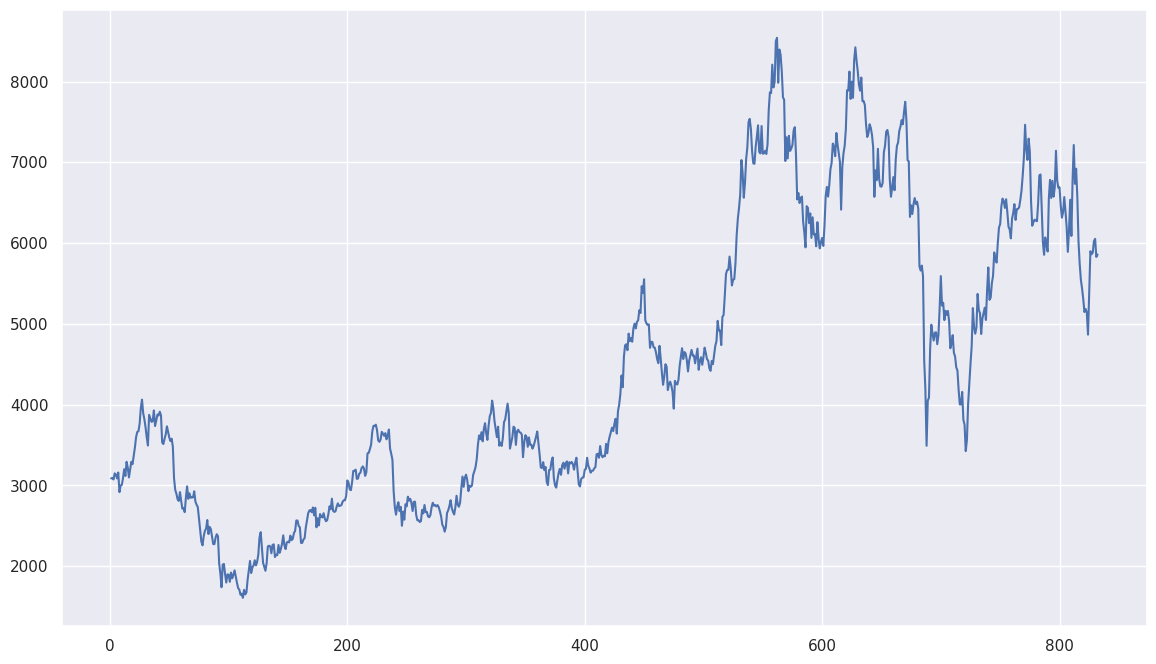

In [162]:
X = df['WIG_PALIWA_opoznione'].iloc[1:]
y = df['WIG_PALIWA'].iloc[1:]
plt.plot(y)

In [148]:
X = df['WIG_opoznione'].iloc[:-1]
y = df['WIG'].iloc[:-1]

In [131]:
y.head()

1    51020.9
2    54048.2
3    53488.0
4    55314.0
5    53826.9
Name: WIG, dtype: float64

In [132]:
X.head()

1    54048.2
2    53488.0
3    55314.0
4    53826.9
5    53834.9
Name: WIG_opoznione, dtype: float64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

611    7189.14
820    5436.26
291    2638.83
560    7926.99
169    2687.73
        ...   
193    2776.64
652    6745.59
457    4777.37
775    7292.66
532    6602.50
Name: WIG_PALIWA_opoznione, Length: 167, dtype: float64

In [157]:
y_test

611    7075.29
820    5306.99
291    2727.18
560    7996.11
169    2693.82
        ...   
193    2743.13
652    7120.81
457    4774.71
775    7125.80
532    7027.15
Name: WIG_PALIWA, Length: 167, dtype: float64

In [158]:
df.iloc[611]

Date                    2018-09-23 00:00:00
WIG                                58237.83
WIG_BUDOW                            1909.0
WIG_NCHROM                          2036.27
WIG_BANKI                           7711.42
WIG_PALIWA                          7075.29
NBP_stopy                               1.5
WIG_opoznione                      58974.76
WIG_PALIWA_opoznione                7189.14
Name: 611, dtype: object

In [159]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [160]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [161]:
print(model_1.predict(X_test))
print(model_1.score(X_test, y_test))

[7183.16372028 5437.96216588 2652.78623578 7917.78158741 2701.47203059
 4191.12792131 5544.40384938 2381.83833802 2581.84834456 7122.60018453
 6519.38418242 2278.32377592 2769.87109201 3129.01096736 3726.34285807
 3290.97835182 2689.10643608 2581.54965871 6255.9332997  7309.25893323
 4556.13199567 2681.48994671 3155.50440295 5832.10802375 2939.84325746
 6558.46224881 1725.35669129 4919.56299117 3575.22772644 3511.19943474
 8112.81349632 3497.34041094 2128.13457045 6364.57530236 3810.064504
 7137.3652221  4702.13959913 6109.63696658 2913.79785066 2999.82933389
 3369.92102403 8039.20734477 3670.8470257  7457.42703106 4946.41484979
 2845.83686183 6432.98431997 7883.16389649 4423.70464254 2879.39919605
 5325.89523205 6844.28470228 3351.86048583 2753.07499061 7184.8164487
 6480.10699213 5067.57178988 5005.32565713 6263.6891758  3667.25283922
 5880.64447564 3401.6812869  4696.46456783 2043.18831251 6508.66136013
 3091.43628646 7306.27207465 4189.00725172 4398.20682648 3832.40620616
 5371.743

In [76]:
from sklearn.metrics import mean_absolute_error

In [143]:
mae = mean_absolute_error(y_test, model_1.predict(X_test))
print(f'Błąd MAE wynosi: {round(mae, 4)}')

Błąd MAE wynosi: 1067.0886


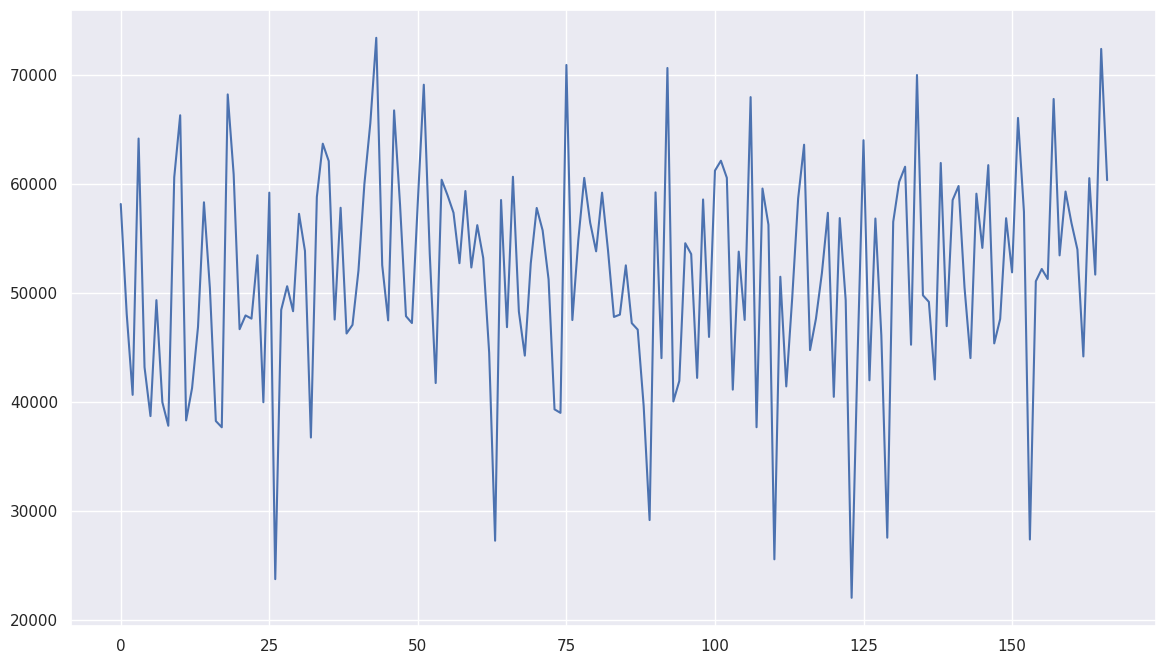

In [144]:
plt.plot(model_1.predict(X_test))

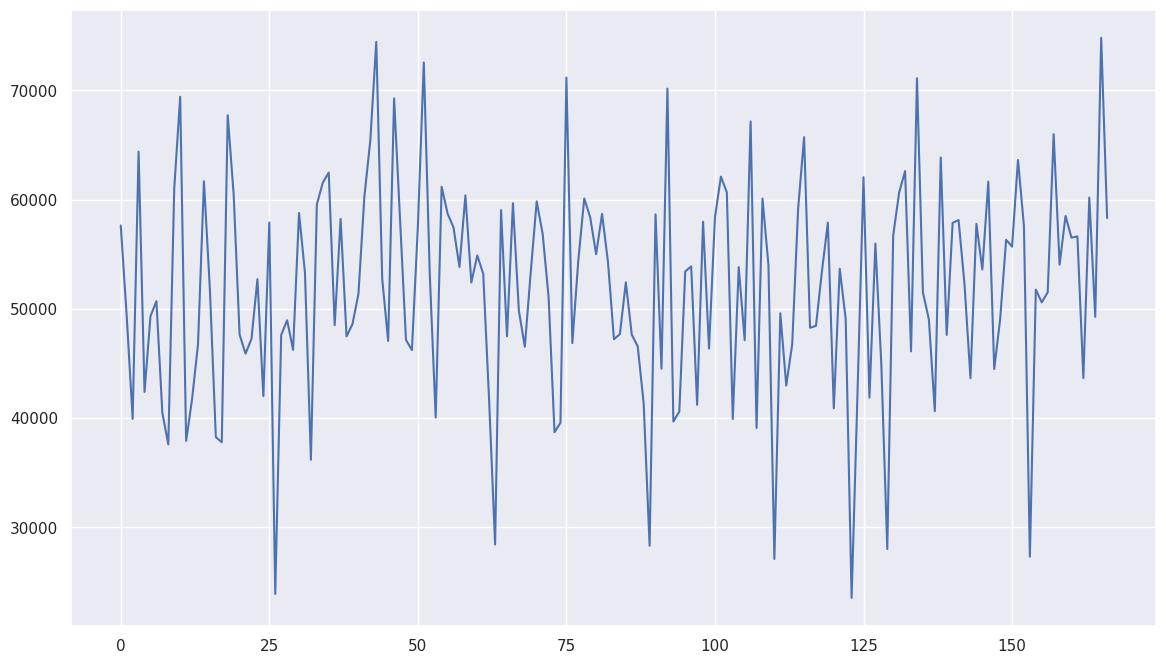

In [145]:
plt.plot(y_test.values)

In [124]:
y_test

611    58237.83
820    48081.16
291    40594.36
560    64289.69
169    43151.30
         ...   
193    44145.24
652    60628.11
457    51710.74
775    72574.53
532    60440.57
Name: WIG, Length: 167, dtype: float64